In [48]:
#Importing
import numpy as np
import pandas as pd 
import seaborn as sns 
from functools import reduce
import matplotlib.pyplot as plt
import altair as alt
from heapq import nlargest

In [49]:
#Importing the dataset and starting EDA
manager_survey = pd.read_csv('manager_survey_data.csv',  sep = ',')
general_data = pd.read_csv('general_data.csv',  sep = ',')
employee_data = pd.read_csv('employee_survey_data.csv',  sep = ',')

In [50]:
manager_survey.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB


In [51]:
general_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [52]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


In [53]:
#Merging and cleaning data
emp_man = pd.merge(manager_survey, employee_data, on='EmployeeID')
data_hr = pd.merge(emp_man, general_data, on='EmployeeID')

data_hr.head()
data_hr.dropna(inplace=True)
data_hr.isnull().sum()
data_hr.drop(['Over18', 'EmployeeCount', 'StandardHours'], inplace=True, axis=1)

### Changing Datatypes

In [54]:

data_hr = data_hr.astype({'EnvironmentSatisfaction':'int64','JobSatisfaction':'int64','WorkLifeBalance':'int64','NumCompaniesWorked':'int64'})
data_hr['Attrition'] = data_hr['Attrition'].replace(['Yes'],True)
data_hr['Attrition'] = data_hr['Attrition'].replace(['No'],False)

In [55]:
data_hr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4300 entries, 0 to 4408
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4300 non-null   int64  
 1   JobInvolvement           4300 non-null   int64  
 2   PerformanceRating        4300 non-null   int64  
 3   EnvironmentSatisfaction  4300 non-null   int64  
 4   JobSatisfaction          4300 non-null   int64  
 5   WorkLifeBalance          4300 non-null   int64  
 6   Age                      4300 non-null   int64  
 7   Attrition                4300 non-null   bool   
 8   BusinessTravel           4300 non-null   object 
 9   Department               4300 non-null   object 
 10  DistanceFromHome         4300 non-null   int64  
 11  Education                4300 non-null   int64  
 12  EducationField           4300 non-null   object 
 13  Gender                   4300 non-null   object 
 14  JobLevel                

## General EDA

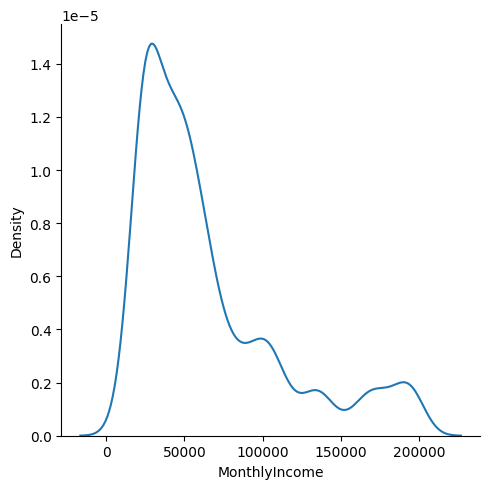

In [56]:
sns.displot(data=data_hr, 
            x="MonthlyIncome",
            kind="kde")

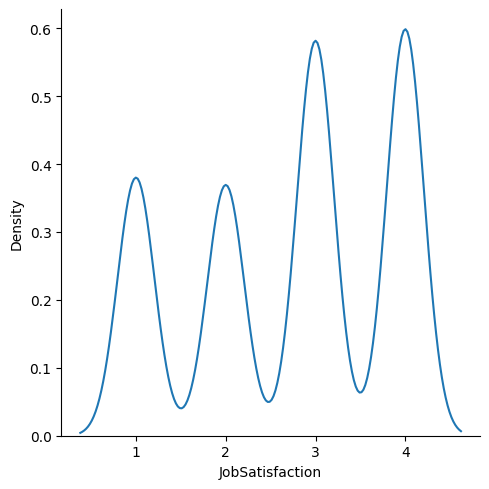

In [57]:
sns.displot(data=data_hr, 
            x="JobSatisfaction",
            kind="kde")

Department
Human Resources           58114.784946
Research & Development    67272.810830
Sales                     61295.485845
Name: MonthlyIncome, dtype: float64

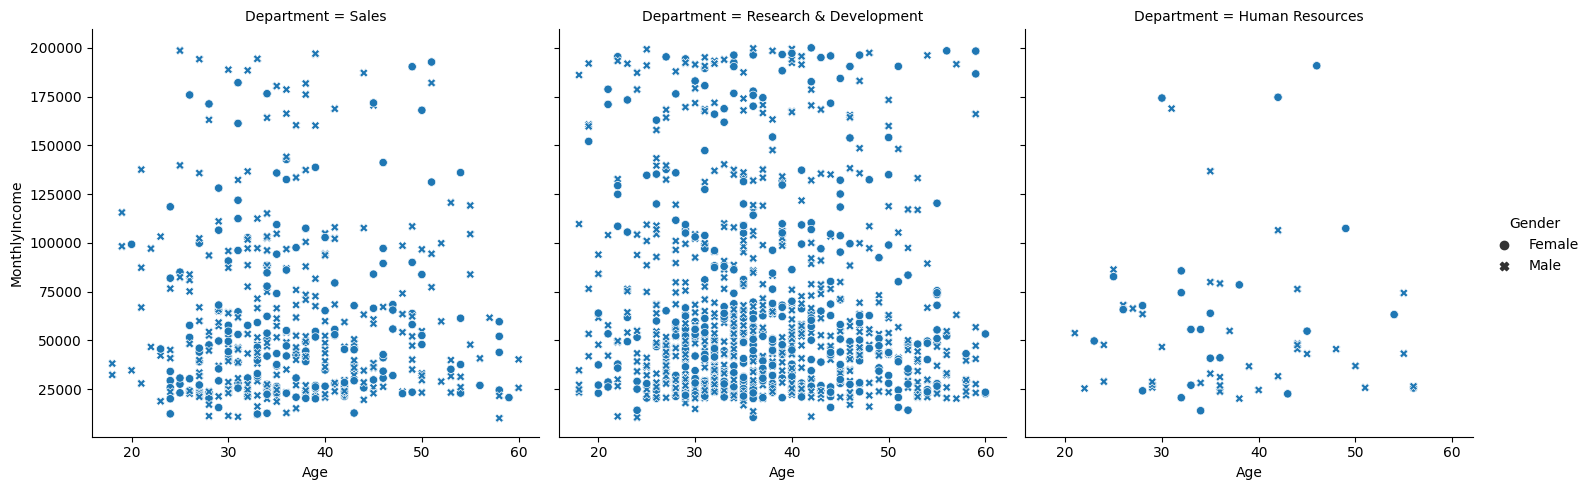

In [58]:
sns.relplot(data=data_hr, 
            x="Age", 
            y="MonthlyIncome",
            kind="scatter",
            col='Department',
            style= 'Gender')

data_hr.groupby('Department').MonthlyIncome.mean()

In [59]:
data_hr.groupby('Attrition').Age.mean()

Attrition
False    37.551734
True     33.686331
Name: Age, dtype: float64

In [60]:
data_hr.groupby('Attrition').JobSatisfaction.mean()

Attrition
False    2.774757
True     2.466187
Name: JobSatisfaction, dtype: float64

In [61]:
data_hr.groupby('Department').JobSatisfaction.mean()

Department
Human Resources           2.693548
Research & Development    2.703598
Sales                     2.775057
Name: JobSatisfaction, dtype: float64

In [62]:
data_hr.head()

,EmployeeID,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,...,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,1,3,3,3,4,2,51,False,Travel_Rarely,Sales,...,Married,131160,1,11,0,1.0,6,1,0,0
1,2,2,4,3,2,4,31,True,Travel_Frequently,Research & Development,...,Single,41890,0,23,1,6.0,3,5,1,4
2,3,3,3,2,2,1,32,False,Travel_Frequently,Research & Development,...,Married,193280,1,15,3,5.0,2,5,0,3
3,4,2,3,4,4,3,38,False,Non-Travel,Research & Development,...,Married,83210,3,11,3,13.0,5,8,7,5
4,5,3,3,4,1,3,32,False,Travel_Rarely,Research & Development,...,Single,23420,4,12,2,9.0,2,6,0,4


In [63]:
data_hr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4300 entries, 0 to 4408
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4300 non-null   int64  
 1   JobInvolvement           4300 non-null   int64  
 2   PerformanceRating        4300 non-null   int64  
 3   EnvironmentSatisfaction  4300 non-null   int64  
 4   JobSatisfaction          4300 non-null   int64  
 5   WorkLifeBalance          4300 non-null   int64  
 6   Age                      4300 non-null   int64  
 7   Attrition                4300 non-null   bool   
 8   BusinessTravel           4300 non-null   object 
 9   Department               4300 non-null   object 
 10  DistanceFromHome         4300 non-null   int64  
 11  Education                4300 non-null   int64  
 12  EducationField           4300 non-null   object 
 13  Gender                   4300 non-null   object 
 14  JobLevel                

## Plots of current employees

In [64]:
AttritionFalse = data_hr[data_hr.Attrition == False]

In [65]:
AttritionFalse.value_counts().sum()

3605

### Age

In [66]:
#New column for age groups
data_hr['AgeGroups'] = pd.cut(data_hr['Age'], bins=[18, 25, 30, 40, 50, 60, 70, np.inf], include_lowest=True)

In [67]:
data_hr['Age'].nlargest(1)

153    60
Name: Age, dtype: int64

In [68]:
data_hr['Age'].nsmallest(1)

38    18
Name: Age, dtype: int64

<AxesSubplot: title={'center': 'Age Groups'}, xlabel='Age group', ylabel='% of employees'>

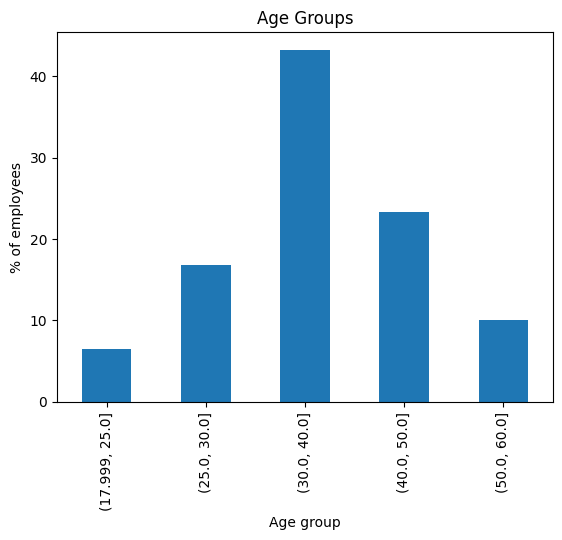

In [69]:
#Bar chart for age groups Current Employees
AttritionFalse = data_hr[data_hr.Attrition == False]
(pd.crosstab(AttritionFalse.AgeGroups, AttritionFalse.AgeGroups.count()).apply(lambda r: r/len(AttritionFalse)*100, axis=1)).plot(kind='bar', title='Age Groups', ylabel='% of employees', xlabel='Age group', legend=False)

### Gender

<AxesSubplot: title={'center': 'Gender Diversity'}>

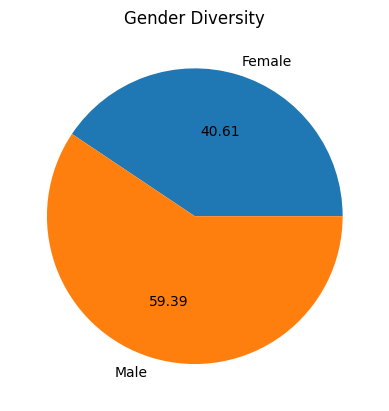

In [70]:
#Pie chart for Gender Diversity Current Employees
AttritionFalse = data_hr[data_hr.Attrition == False]
AttritionFalse.groupby('Gender').size().plot(kind='pie', autopct='%.2f', title='Gender Diversity')

### Education Field

<AxesSubplot: title={'center': 'Education Field'}, xlabel='Education field', ylabel='% of employees'>

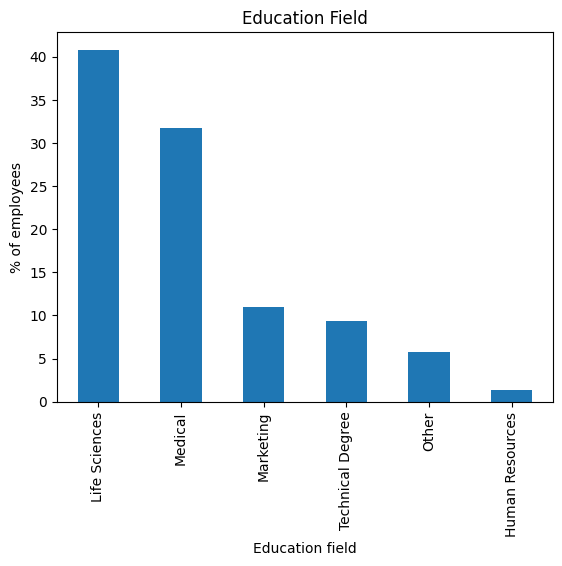

In [71]:
#Bar chart for Education Field
(pd.crosstab(AttritionFalse.EducationField, AttritionFalse.EducationField.count()).apply(lambda r: r/len(AttritionFalse)*100, axis=1)).sort_values(AttritionFalse.EducationField.count(), ascending=False).plot(kind='bar', title='Education Field', ylabel='% of employees', xlabel='Education field', legend=False)

### Income

In [72]:
# Income Groups
data_hr['IncomeGroups'] = pd.cut(data_hr['MonthlyIncome'], bins=[10000, 25000, 50000, 75000, 100000, 125000, 150000, 175000, 200000, np.inf])

<AxesSubplot: title={'center': 'Income Groups'}, xlabel='Income Group', ylabel='% of employees'>

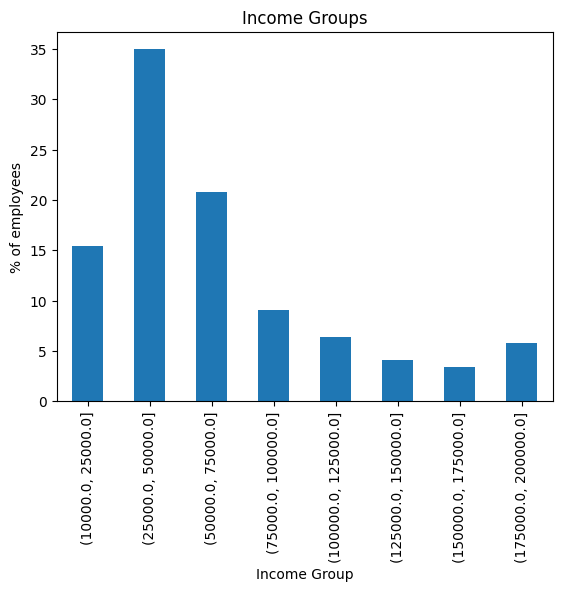

In [73]:
AttritionFalse = data_hr[data_hr.Attrition == False]
(pd.crosstab(AttritionFalse.IncomeGroups, AttritionFalse.IncomeGroups.count()).apply(lambda r: r/len(AttritionFalse)*100, axis=1)).plot(kind='bar', title='Income Groups', ylabel='% of employees', xlabel='Income Group', legend=False)

### Years at Company (change to below 2 if possible)

In [74]:
#New column: Years at Company Groups
data_hr['YearsAtCompanyGroups'] = pd.cut(data_hr['YearsAtCompany'], bins=[-1, 2, 5, 10, 15, 20, 30, 40, np.inf])

<AxesSubplot: title={'center': 'Years at Company'}, xlabel='Years at Company', ylabel='% of employees'>

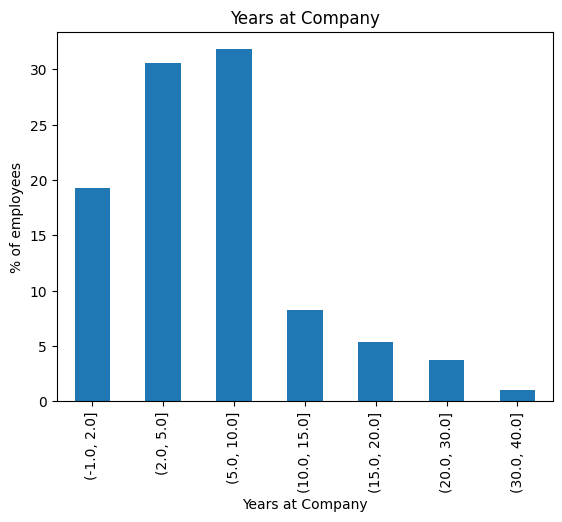

In [75]:
AttritionFalse = data_hr[data_hr.Attrition == False]
(pd.crosstab(AttritionFalse.YearsAtCompanyGroups, AttritionFalse.YearsAtCompanyGroups.count()).apply(lambda r: r/len(AttritionFalse)*100, axis=1)).plot(kind='bar', title='Years at Company', ylabel='% of employees', xlabel= 'Years at Company', legend=False)

### Training

<AxesSubplot: title={'center': 'Number of Trainings last year'}, xlabel='Number of Trainings', ylabel='% of employees'>

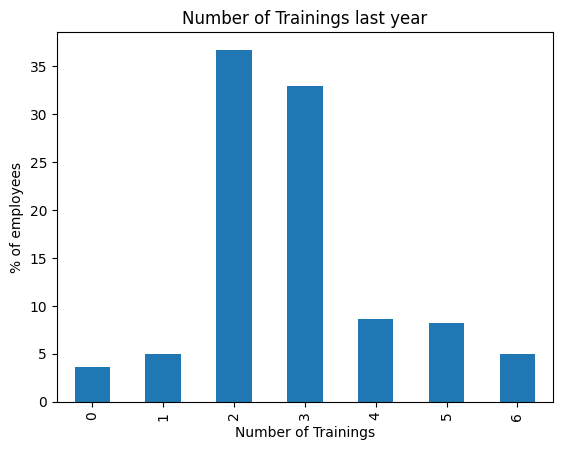

In [76]:
AttritionFalse = data_hr[data_hr.Attrition == False]
(pd.crosstab(AttritionFalse.TrainingTimesLastYear, AttritionFalse.TrainingTimesLastYear.count()).apply(lambda r: r/len(AttritionFalse)*100, axis=1)).plot(kind='bar', title='Number of Trainings last year', ylabel='% of employees', xlabel='Number of Trainings', legend=False)

### Promotions 
- maybe re-create stating number of promotions last year, the year before etc.

In [86]:
#New Attrition false for employees that have been at the company for 1 year or more.
AttritionFalse2 = AttritionFalse[AttritionFalse.YearsAtCompany >=1]

<AxesSubplot: title={'center': 'Years since last promotion'}, xlabel='Number of years since last promotion within company', ylabel='% of employees'>

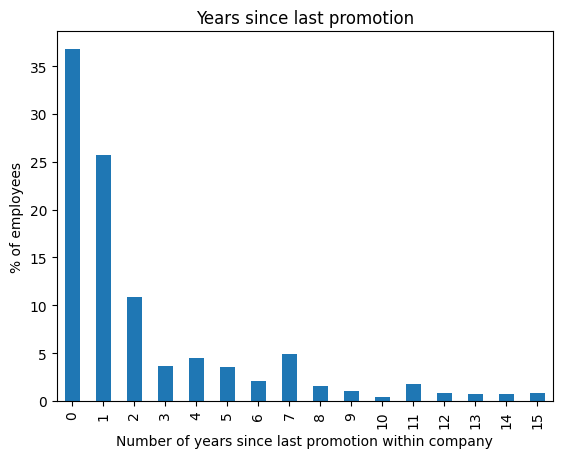

In [90]:

(pd.crosstab(AttritionFalse2.YearsSinceLastPromotion, AttritionFalse2.YearsSinceLastPromotion.count()).apply(lambda r: r/len(AttritionFalse2)*100, axis=1)).plot(kind='bar', title='Years since last promotion', ylabel='% of employees', xlabel='Number of years since last promotion within company', legend=False)

### Salary Hike

In [ ]:
#Grouping salary hike 
data_hr['PercentSalaryHikeGroups'] = pd.cut(data_hr['PercentSalaryHike'], bins=[0, 5, 10, 15, 20, 25, 30, 35, 40])

In [ ]:
AttritionFalse = data_hr[data_hr.Attrition == False]

(pd.crosstab(AttritionFalse.PercentSalaryHikeGroups, AttritionFalse.PercentSalaryHikeGroups.count()).apply(lambda r: r/len(AttritionFalse)*100, axis=1)).plot(kind='bar', title='Percent salary hike', ylabel='% of employees', xlabel='Salary hike%', legend=False)

### Performance

In [ ]:
AttritionFalse = data_hr[data_hr.Attrition == False]
(pd.crosstab(AttritionFalse.PerformanceRating, AttritionFalse.PerformanceRating.count()).apply(lambda r: r/len(AttritionFalse)*100, axis=1)).sort_values(AttritionFalse.PerformanceRating.count(), ascending=False).plot(kind='bar', title='Performance Rating', ylabel='% of employees', xlabel='Performance rating', legend=False)

In [ ]:
#checking the lowest performance rating
data_hr['PerformanceRating'].nsmallest(1)

### Job Satisfaction

In [ ]:
AttritionFalse = data_hr[data_hr.Attrition == False]
(pd.crosstab(AttritionFalse.JobSatisfaction, AttritionFalse.JobSatisfaction.count()).apply(lambda r: r/len(AttritionFalse)*100, axis=1)).sort_values(AttritionFalse.JobSatisfaction.count(), ascending=True).plot(kind='bar', title='Job Satisfaction', ylabel='% of employees', xlabel='Job satisfaction', legend=False)

### Title

In [ ]:
#Bar chart for Education Field
(pd.crosstab(AttritionFalse.JobRole, AttritionFalse.JobRole.count()).apply(lambda r: r/len(AttritionFalse)*100, axis=1)).sort_values(AttritionFalse.JobRole.count(), ascending=False).plot(kind='bar', title='Job Role', ylabel='% of employees', xlabel='Job role', legend=False)

## Correlation Matrix

In [ ]:
#quick correlation check

# Compute the correlation matrix
corr = data_hr.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## UML

In [ ]:
print(data_hr)

In [ ]:
#Making a dataframe with no text for UML model
data_to_cluster = data_hr[['Attrition', 'JobSatisfaction', 'EmployeeID', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction', 'WorkLifeBalance', 'Age', 'DistanceFromHome', 'Education', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]

In [ ]:
data_to_cluster.info()

In [ ]:
#Importing UML packages
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
# learn x-y relationships (principal components) and transform
data_to_cluster_scaled = scaler.fit_transform(data_to_cluster)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler_min_max = MinMaxScaler()

In [ ]:
data_to_cluster_minmax = scaler_min_max.fit_transform(data_to_cluster)

In [ ]:
data_to_cluster

### PCA

In [ ]:
# load up and instantiate PCS
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [ ]:
# fit-transform the data
data_reduced_pca = pca.fit_transform(data_to_cluster_scaled)

In [ ]:
print(pca.components_)

In [ ]:
pca.components_.shape

In [ ]:
print(pca.explained_variance_ratio_)

In [ ]:
#sns.scatterplot(data_reduced_pca[:,0],data_reduced_pca[:,2])

In [ ]:
vis_data = pd.DataFrame(data_reduced_pca)
vis_data['EmployeeID'] = data_hr['EmployeeID']
vis_data['Department'] = data_hr['Department']
vis_data.columns = ['x', 'y', 'EmployeeID', 'Department']

In [ ]:
# alt.Chart(vis_data).mark_circle(size=60).encode(
#     x='x',
#     y='y',
#     tooltip=['EmployeeID', 'Department']
# ).interactive()

In [ ]:
plt.figure(figsize=(18,2))
sns.heatmap(pd.DataFrame(pca.components_, columns=data_to_cluster.columns), annot=True)

### NMF

In [ ]:
# import nmf
from sklearn.decomposition import NMF

In [ ]:
# instantiate with 4 components
nmf = NMF(n_components=4)

In [ ]:
# notice, we are using the min-max scaled data
data_reduced_nmf = nmf.fit_transform(data_to_cluster_minmax)

In [ ]:
data_reduced_nmf.shape

In [ ]:
nmf.components_.shape

In [ ]:
plt.figure(figsize=(20,3))
sns.heatmap(pd.DataFrame(nmf.components_, columns=data_to_cluster.columns), annot=True)

### Modern Algorithms

In [ ]:
import umap

In [ ]:
# we totally could specify more than 2 dimensions (as well as some other parameters)
umap_scaler = umap.UMAP()

In [ ]:
# umap accepts standard-scaled data
embeddings = umap_scaler.fit_transform(data_to_cluster_scaled)

In [ ]:
#sns.scatterplot(embeddings[:,0],embeddings[:,1])

In [ ]:
vis_data = pd.DataFrame(embeddings)
vis_data['EmployeeID'] = data_hr['EmployeeID']
vis_data['Department'] = data_hr['Department']
vis_data.columns = ['x', 'y', 'EmployeeID', 'Department']

In [ ]:
alt.Chart(vis_data).mark_circle(size=60).encode(
    x='x',
    y='y',
    tooltip=['EmployeeID', 'Department']
).interactive()

In [ ]:
from sklearn.cluster import KMeans
clusterer = KMeans(n_clusters=3)

In [ ]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_to_cluster_scaled)
    Sum_of_squared_distances.append(km.inertia_)

In [ ]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
umap_scaler_km = umap.UMAP(n_components=6)
embeddings_km = umap_scaler.fit_transform(data_to_cluster_scaled)


Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(embeddings_km)
    Sum_of_squared_distances.append(km.inertia_)


plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
# back to our k-means instance. We take 3 clusters on non-reduced data
clusterer = KMeans(n_clusters=3, random_state=0, n_init=10)
label = clusterer.fit_predict(embeddings)
centroids = clusterer.cluster_centers_

vis_data = pd.DataFrame(embeddings)
vis_data['EmployeeID'] = data_hr['EmployeeID']
vis_data['Department'] = data_hr['Department']
vis_data.columns = ['x', 'y', 'EmployeeID', 'Department']

In [ ]:
print(label)
df_t = pd.DataFrame(data=embeddings, columns=['x', 'y'])
df_t['EmployeeID'] = data_hr['EmployeeID']
df_t['Department'] = data_hr['Department']
df_t.columns = ['x', 'y', 'EmployeeID', 'Department']
df_t['label'] = label
only_0 = df_t[df_t['label'] == 0]
only_1 = df_t[df_t['label'] == 1]
only_2 = df_t[df_t['label'] == 2]

plt.scatter(only_0['x'], only_0['y'], color='blue')
plt.scatter(only_1['x'], only_1['y'], color='red')
plt.scatter(only_2['x'],only_2['y'], color ='green')
df_t.info()
df_t.head()

In [ ]:
df_t

### EDA for the clusters 

In [ ]:
vis_cluster = pd.merge(data_hr, df_t, on='EmployeeID')

In [ ]:
#Get an idea of how many entries there is in every cluster 
vis_cluster.head()
vis_cluster['label'].value_counts().nlargest()

In [ ]:
vis_cluster.groupby('label').mean()

#### Splitting the data up into the three different clusters

In [ ]:
label_0 = vis_cluster[vis_cluster['label'] <= 0]
label_1 = vis_cluster[vis_cluster['label'] <= 1]
label_2 = vis_cluster[vis_cluster['label'] <= 2]


#### Tabels that describes every cluster

In [ ]:
label_0.head()

In [ ]:
label_0.describe()

In [ ]:
label_1.describe()

In [ ]:
label_2.describe()

#### A tabel with the mean of all the clusters, together. To see if there are any major differences, with regards to clustering them 

In [ ]:
vis_cluster.groupby.mean()

In [ ]:
label_0['label'].value_counts()
label_1['label'].value_counts()
label_2['label'].value_counts()


In [ ]:
label_0.groupby(['Attrition'])['Attrition','JobSatisfaction'].value_counts().nlargest()

#### Piecharts for the three clusters, with regards to attrition

In [ ]:
label_0.groupby('Attrition').size().plot(kind='pie', autopct='%.2f', title='Hidden Groups')

In [ ]:
label_1.groupby('Attrition').size().plot(kind='pie', autopct='%.2f', title='Hidden Groups')


In [ ]:
label_2.groupby('Attrition').size().plot(kind='pie', autopct='%.2f', title='Hidden Groups')

# SML
### Feature engineering
##### Binning

In [ ]:
data_hr ['Age_b'] = pd.cut(data_hr['Age'],
                    bins=[18, 25, 30, 40, 50, 60, np.inf],
                    include_lowest = True)

In [ ]:
#Comment: income_groups = pd.cut(data_hr['MonthlyIncome'],
#bins=[10000, 25000, 50000, 75000, 100000, 125000, 150000, 175000, 200000, np.inf])

data_hr ['TotalWorkingYears_b'] = pd.cut(data_hr['TotalWorkingYears'],
                                  bins=[0,5, 10, 15, 20, 25, 30, 35, 40],
                                  include_lowest = True)

In [ ]:
data_hr ['YearsAtCompany_b'] = pd.cut(data_hr['YearsAtCompany'],
                               bins=[0, 5, 10, 15, 20, 25, 30, 35, 40],
                               include_lowest = True)

In [ ]:
data_hr ['YearsWithCurrManager_b'] = pd.cut(data_hr['YearsWithCurrManager'],
                                     bins=[0, 5, 10, 15, np.inf],
                                     include_lowest = True)

In [ ]:
data_hr

In [ ]:
data_hr[data_hr['EmployeeID'] == 1]

In [ ]:
selected_sml_df = data_hr[['Age',
                           'TotalWorkingYears',
                           'YearsAtCompany',
                           'YearsWithCurrManager',
                           'EnvironmentSatisfaction',
                           'JobSatisfaction',
                           'Attrition']]

In [ ]:
selected_sml_df

In [ ]:
X = selected_sml_df.iloc[:,:-1]

y = selected_sml_df.Attrition

#from sklearn.preprocessing import OneHotEncoder

#import itertools

#ohe_X = OneHotEncoder(sparse=False)
#sparse could be True - we don't know

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
transformed_nummerical = scaler.fit_transform(X.iloc[:,:])

X.iloc[:,:] = transformed_nummerical

In [ ]:
X

In [ ]:
X.index = range(len(X))

In [ ]:
X.index

### Spliting and preparing for ML

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
!pip install xgboost -U -q

from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error

model_xgb = XGBRegressor()

model_xgb.fit(X_train, y_train)

In [ ]:
print('Model XGB' + ' ' + str(model_xgb.score(X_train, y'_train)))

In [ ]:
data_hr['Attrition'].value_counts()

In [ ]:
y_pred_train = model_xgb.predict(X_train)

mean_squared_error(y_train, y_pred_train, squared=False)

In [ ]:
len(y_pred_train)

In [ ]:
y_pred_train

In [ ]:
y_pred_train = model_xgb.predict(X_train)

mean_squared_error(y_train, y_pred_train, squared=False)

In [ ]:
feat_importances = pd.Series(model_xgb.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [ ]:
!pip install shap

In [ ]:
import shap

In [ ]:
explainer = shap.TreeExplainer(model_xgb)

shap_values = explainer.shap_values(X)

shap.summary_plot(shap_values, X, plot_type="bar")

shap.summary_plot(shap_values, X)

shap.dependence_plot("TotalWorkingYears", shap_values, X)

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[1,:], X.iloc[1,:])